In [1]:
from google.colab import drive

drive.mount('/content/gdrive')

import cv2
from google.colab.patches import cv2_imshow
import numpy as np
import matplotlib.pyplot as plt

Mounted at /content/gdrive


(256, 256)


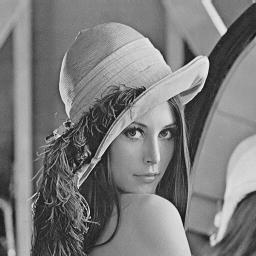

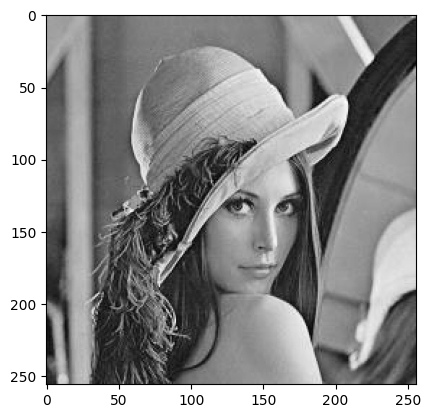

In [3]:
img = cv2.imread('/content/gdrive/My Drive/디지털 영상처리 강의 관련/Images/lena256.jpg')

#print(img.shape)
#cv2_imshow(img)
RGB_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
#plt.imshow(RGB_img)

gimg = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
print(gimg.shape)
cv2_imshow(gimg)
plt.imshow(gimg, cmap='gray')

# 영상의 특징 검출 기법
## 소벨 에지 검출기

In [5]:
# 소벨 에지 필터
gx = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]], dtype=int)
gy = np.array([[1, 2, 1], [0, 0, 0], [-1, -2, -1]], dtype=int)

In [32]:
# 컨벌루션
x = cv2.filter2D(gimg, -1, gx) # -1은 입력 영상과 같은 타입, 크기의 영상을 생성
y = cv2.filter2D(gimg, -1, gy)

In [33]:
# 절대값을 취한 후 가중합
absX = cv2.convertScaleAbs(x)
absY = cv2.convertScaleAbs(y)
outimg = cv2.addWeighted(absX, 0.5, absY, 0.5, 0)

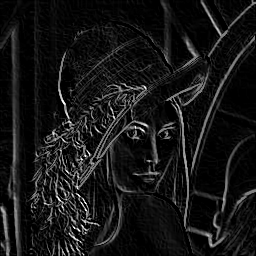

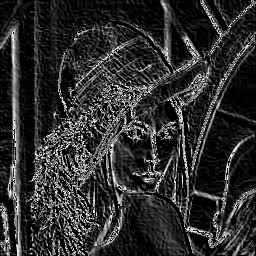

In [34]:
cv2_imshow(outimg)
cv2_imshow(outimg*3)

In [35]:
# 이진화 처리 작업을 위한 작업공간
gBin = np.zeros((gimg.shape[0], gimg.shape[1]), dtype=np.ubyte)

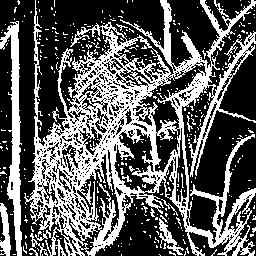

In [45]:
# 임계값을 적용해 이진화
threshold = 20

for h in range(gimg.shape[0]):
    for w in range(gimg.shape[1]):
        if (outimg[h, w] > threshold):
            gBin[h, w] = 255

cv2_imshow(gBin)

## 캐니 에지 검출기

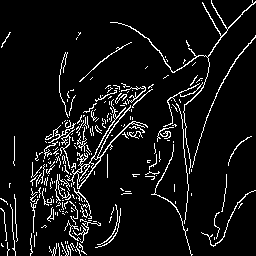

In [48]:
cannyimg = cv2.Canny(gimg, 200, 250)
cv2_imshow(cannyimg)

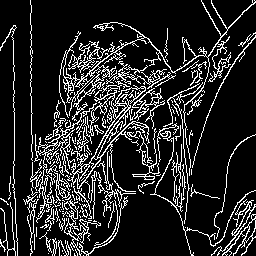

In [50]:
cannyimg = cv2.Canny(gimg, 20, 200)
cv2_imshow(cannyimg)

In [51]:
# 실제로 구현해본다면
# 먼저 가우시안 필터링
blurimg = cv2.GaussianBlur(gimg, (5, 5), 1.4)

In [52]:
x = cv2.filter2D(blurimg, -1, gx) # -1은 입력 영상과 같은 타입, 크기의 영상을 생성
y = cv2.filter2D(blurimg, -1, gy)

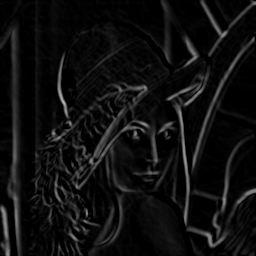

In [53]:
absX = cv2.convertScaleAbs(x)
absY = cv2.convertScaleAbs(y)
cannyoutimg = cv2.addWeighted(absX, 0.5, absY, 0.5, 0)
cv2_imshow(cannyoutimg)

In [55]:
# 방향 계산
cannyDirection= np.arctan2(y, x)
# 이후에 non maximum suppression 필요